<a href="https://colab.research.google.com/github/inoueshinji8/PythonStudy/blob/main/quantum_chemistry2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tsujimotter.hatenablog.com/entry/visualization-of-atomic-orbitals

前回は動径方向の方程式を考慮しなかったので今回はそれも含める<br>
ラゲールの倍多項式が入って来る<br>
またこの解は規格化、つまり波動関数の2乗の空間3重積分が1になるようにできている<br>
その積分を解くときには動径部分だけで確率1、角度だけで確率1となるようにする<br>
確かに特定方向だけ存在しないとかは無いので

そうすると、動径分布関数は山のある形になるのだが
この山の部分こそ、水素原子の1s軌道の半径なのでは？と考えられる<br>
これをボーア半径a0とする

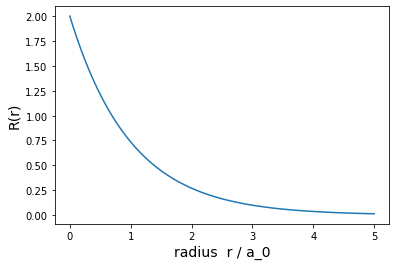

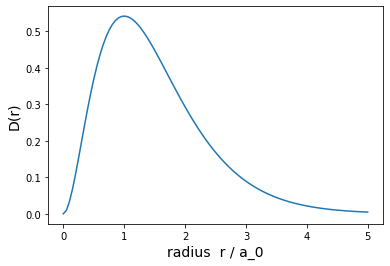

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 動径波動関数（ボーア半径を a_0 = 1 になるようなスケールを考える）
def radial_wave_function(r, n, l):
    Z = 1        # 水素原始を想定しているので Z = 1
    rho = 2.0 * Z * r / n
    if n == 1 and l == 0:
        return (Z ** 1.5) * np.exp(-rho/2.0) * 2.0
    elif n == 2 and l == 0:
        return (Z ** 1.5) * np.exp(-rho/2.0) * (2.0 - rho) / (2.0*np.sqrt(2.0))
    elif n == 2 and l == 1:
        return (Z ** 1.5) * np.exp(-rho/2.0) * rho / (2.0*np.sqrt(6.0))
    elif n == 3 and l == 0:
        return (Z ** 1.5) * np.exp(-rho/2.0) * (6.0 - 6.0*rho + rho**2) / (9.0*np.sqrt(3.0))
    elif n == 3 and l == 1:
        return (Z ** 1.5) * np.exp(-rho/2.0) * (4.0 - rho) * rho / (9.0*np.sqrt(6.0))
    elif n == 3 and l == 2:
        return (Z ** 1.5) * np.exp(-rho/2.0) * (rho**2) / (9.0*np.sqrt(30.0))
    
    
# 量子数の設定
n = 1
l = 0

# グラフの描画部分
r = np.linspace(0, 5, 100)

plt.figure()
plt.plot(r, radial_wave_function(r, n, l))  # 動径波動関数
plt.xlabel("radius  r / a_0", fontsize=14)
plt.ylabel("R(r)", fontsize=14)
plt.savefig("R_r_1s.jpg", dpi=120)
plt.show()

plt.figure()
plt.plot(r, (radial_wave_function(r, n, l)**2) * (r**2))  # 動径分布関数
plt.xlabel("radius  r / a_0", fontsize=14)
plt.ylabel("D(r)", fontsize=14)
plt.savefig("D_r_1s.jpg", dpi=120)
plt.show()

ところで描画に4次元必要だがどうするか<br>

3次元の散布図で描いてみる？遅い

全体に占める確率90%となるような領域を可視化するのがいい

これは作者のアイディアとの事！

In [2]:
# 「90%サンプリング法」による水素原子の軌道（電子雲）の可視化

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

import math

In [3]:
# 動径波動関数（ボーア半径を a_0 = 1 に正規化）
def radial_wave_function(r, n, l):
    Z = 1        # 水素原始を想定しているので Z = 1
    rho = 2.0 * Z * r / n
    if n == 1 and l == 0:
        return (Z ** 1.5) * np.exp(-rho/2.0) * 2.0
    elif n == 2 and l == 0:
        return (Z ** 1.5) * np.exp(-rho/2.0) * (2.0 - rho) / (2.0*np.sqrt(2.0))
    elif n == 2 and l == 1:
        return (Z ** 1.5) * np.exp(-rho/2.0) * rho / (2.0*np.sqrt(6.0))
    elif n == 3 and l == 0:
        return (Z ** 1.5) * np.exp(-rho/2.0) * (6.0 - 6.0*rho + rho**2) / (9.0*np.sqrt(3.0))
    elif n == 3 and l == 1:
        return (Z ** 1.5) * np.exp(-rho/2.0) * (4.0 - rho) * rho / (9.0*np.sqrt(6.0))
    elif n == 3 and l == 2:
        return (Z ** 1.5) * np.exp(-rho/2.0) * (rho**2) / (9.0*np.sqrt(30.0))


In [4]:
# 球面調和関数（ただし、実関数表示したもの）
def spherical_harmonics(theta, phi, l, m):
    if l == 0:
        if m == 0:
            # l=0, m=0
            return np.sqrt(1.0/(4*np.pi))
    if l == 1:
        if m == 0:
            # l=1, m=0
            return np.sqrt(3.0/(4.0*np.pi)) * np.cos(theta)
        if m == 1:
            # l=1, m=+1
            return np.sqrt(3.0/(4.0*np.pi)) * np.sin(theta) * np.cos(phi)
        if m == -1:
            # l=1, m=+1
            return np.sqrt(3.0/(4.0*np.pi)) * np.sin(theta) * np.sin(phi)
    if l == 2:
        if m == 0:
            return np.sqrt(5.0/(16.0*np.pi)) * (3.0*(np.cos(theta)**2) - 1.0)
        if m == 1:
            return np.sqrt(15.0/(4.0*np.pi)) * np.cos(theta) * np.sin(theta) * np.cos(phi)
        if m == -1:
            return np.sqrt(15.0/(4.0*np.pi)) * np.cos(theta) * np.sin(theta) * np.sin(phi)
        if m == 2:
            return np.sqrt(15.0/(16.0*np.pi)) * (np.sin(theta)**2) * np.cos(2*phi)
        if m == -2:
            return np.sqrt(15.0/(16.0*np.pi)) * (np.sin(theta)**2) * np.sin(2*phi)

In [5]:
# 水素原子の波動関数 Ψ_{n,l,m}(x, y, z)
def f(x, y, z, n, l, m):
    # 座標系を (x,y,z) -> (r,θ,φ) に変換
    r = np.sqrt(x*x + y*y + z*z)
    
    theta = 0.0
    phi = 0.0
    if r > 0:
        theta = np.arccos( z / r )
    if y == 0:
        if x < 0:
            phi = np.pi
    elif x*x+y*y > 0:
        phi = np.sign(y) * np.arccos(x/np.sqrt(x*x+y*y))
        
    # 動径波動関数と球面調和関数の積を計算して出力
    return (radial_wave_function(r, n, l) * spherical_harmonics(theta, phi, l, m))

In [6]:
# 量子数（好きな量子数を選んでください）
n = 2
l = 1
m = 0


# サンプリングの設定
N = 30                    # サンプリング数（x,y,zをそれぞれ N 等分する）
x_range = 10              # 計算したい全体領域の範囲 (-x_range <= x,y,z <= x_range)
delta = 2.0*x_range / N   # サンプリング間隔

In [7]:
# 3次元空間を格子状にして、各グリッドの確率密度関数をサンプリング（間隔 delta, グリッド数 N^3 個）
data_list = []
for i in range(N):
    for j in range(N):
        for k in range(N):
            # 各グリッドの点 (x,y,z) を計算
            x = i*delta - x_range
            y = j*delta - x_range
            z = k*delta - x_range
            
            # グリッドの代表点の座標 (x,y,z) における波動関数 Ψ(x,y,z) を計算
            psi = f(x,y,z,n,l,m)
            
            # 波動関数の2乗によって電子の確率密度関数 |Ψ(x,y,z)|^2 を計算
            pdf = psi**2
            
            # 確率密度(|Ψ(x,y,z)|^2, p.d.f), x, y, z, 波動関数の生の値 Ψ(x,y,z) の順にデータを格納
            data_list.append([pdf, x, y, z, psi])

In [8]:
# 確率密度が高い順にグリッドをソートする
sorted_list = sorted(data_list, key=lambda data: data[0], reverse=True)  # 確率密度(p.d.f)でソート



# 波動関数が正のデータを格納する変数
x1_list = []
y1_list = []
z1_list = []

# 波動関数が負のデータを格納する変数
x2_list = []
y2_list = []
z2_list = []

In [9]:
# |Ψ|^2 ΔV の総和( total )が 0.9 以上になるまで足し合わせる（totalが0.9以上になったらwhileを抜ける）
total = 0.0
i = 0
while total < 0.9:
    pdf = sorted_list[i][0]  # 確率密度関数 |Ψ(x,y,z)|^2
    x = sorted_list[i][1]
    y = sorted_list[i][2]
    z = sorted_list[i][3]
    psi = sorted_list[i][4]
    
    # 現在考えているグリッドの |Ψ(x,y,z)|^2 ΔV の計算
    grid_probability = pdf * delta**3
    total += grid_probability
    
    if psi > 0:
        x1_list.append(x)
        y1_list.append(y)
        z1_list.append(z)
    else:
        x2_list.append(x)
        y2_list.append(y)
        z2_list.append(z)   
    i += 1

In [10]:
# データを ndarray に変換
X1 = np.array(x1_list)
Y1 = np.array(y1_list)
Z1 = np.array(z1_list)

X2 = np.array(x2_list)
Y2 = np.array(y2_list)
Z2 = np.array(z2_list)


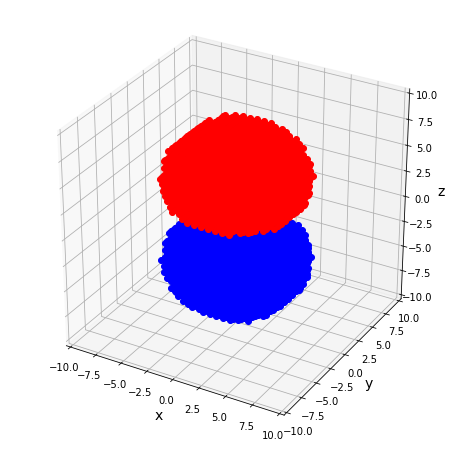

In [11]:
# figureを生成する
fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.set_xlim3d(-x_range, x_range)
ax.set_ylim3d(-x_range, x_range)
ax.set_zlim3d(-x_range, x_range)

# 軸の設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

ax.plot(X2,Y2,Z2,color='b',marker="o",linestyle='None')
ax.plot(X1,Y1,Z1,color='r',marker="o",linestyle='None')

plt.show()

こんなのすぐ計算・描画できるなんて凄過ぎでしょ！！！<br>
やって良かった

でもこの次により大きな原子核だとZの値を大きくしてスレーター則を入れろとどんどんややこしくなる。頑張ろう

次回
https://tsujimotter.hatenablog.com/entry/metropolis-hastings-algorithm
日曜化学(2.5)：メトロポリス・ヘイスティングス法を用いた電子雲の可視化（Python/matplotlib）
今回の補講だ

次に
https://tsujimotter.hatenablog.com/entry/molecular-orbital-visualization
これで「簡単な有機物」なら表示できる仕組みがなんとなくｗ分かる